# **Oil Palm Fruit Ripeness Detection**


Program Machine Learning untuk mendeteksi kematangan buah kelapa sawit. Program dibuat menggunakan Algoritma You Only Look Once (YOLOv8).


<center>
    <img src="https://www.pagi.co.id/data/file/business/thumb-3394069794_8hoJlUYR_A013117103_600x400.jpg" width="10500" height="290"/>
</center>

---

Laju  ekstraksi  minyak  (OER)  tandan  buah  segar  (TBS)  kelapa  sawit  sangat  bergantung  pada  tahap kematangannya.  Proses  mendeteksi  kematangan  TBS  kelapa  sawit mengalami  kesulitan  jika  dilakukan secara manual. Petani kesulitan, menjangkau buah untuk mendeteksi kematangan dengan mata, ketika pohon   sawit   telah   tinggi.   Sehingga   diperlukan   suatu   sistem   yang   mampu   mendeteksi   tingkat kematangan   TBS   kelapa   sawit   berdasarkan   warna.

## Akses GPU
[ Memeriksa Ketersediaan GPU ]

In [ ]:
!nvidia-smi

Wed May 29 01:05:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8               9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Import Packages
[ Mendapatkan Direktori Kerja Saat Ini ]

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content/datasets


## Install YOLOv8
[Menginstal paket YOLOv8 dari ultralytics ]

In [ ]:
# Pip install method (recommended)
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.4/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## Preparing a custom dataset


[![Roboflow Notebooks](https://media.roboflow.com/notebooks/template/bannertest2-2.png?ik-sdk-version=javascript-1.4.3&updatedAt=1672932710194)](https://app.roboflow.com/zah/palm-oil-fg85a/browse?queryText=&pageSize=50&startingIndex=0&browseQuery=true)


In [ ]:
# Membuat Direktori untuk Dataset
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="QBy4xD3p3rRn8obvbj8J")
project = rf.workspace("zah").project("palm-oil-33")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to palm-oil-33-2 in yolov8:: 100%|██████████| 13196/13196 [00:03<00:00, 3741.83it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml batch=16 epochs=100 imgsz=540 plots=True

/content/datasets
100% 21.5M/21.5M [00:00<00:00, 256MB/s]
New https://pypi.org/project/ultralytics/8.2.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/datasets/palm-oil-33-2/data.yaml, epochs=100, patience=50, batch=16, imgsz=540, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_

In [ ]:
# menampilkan daftar file dan direktori
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		  val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		  val_batch0_pred.jpg
confusion_matrix.png				    results.png		  val_batch1_labels.jpg
events.out.tfevents.1716944804.95356cd53341.2657.0  train_batch0.jpg	  val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch26100.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch26101.jpg  weights
P_curve.png					    train_batch26102.jpg
PR_curve.png					    train_batch2.jpg


## Display the Training Result Model Graph

/content/datasets


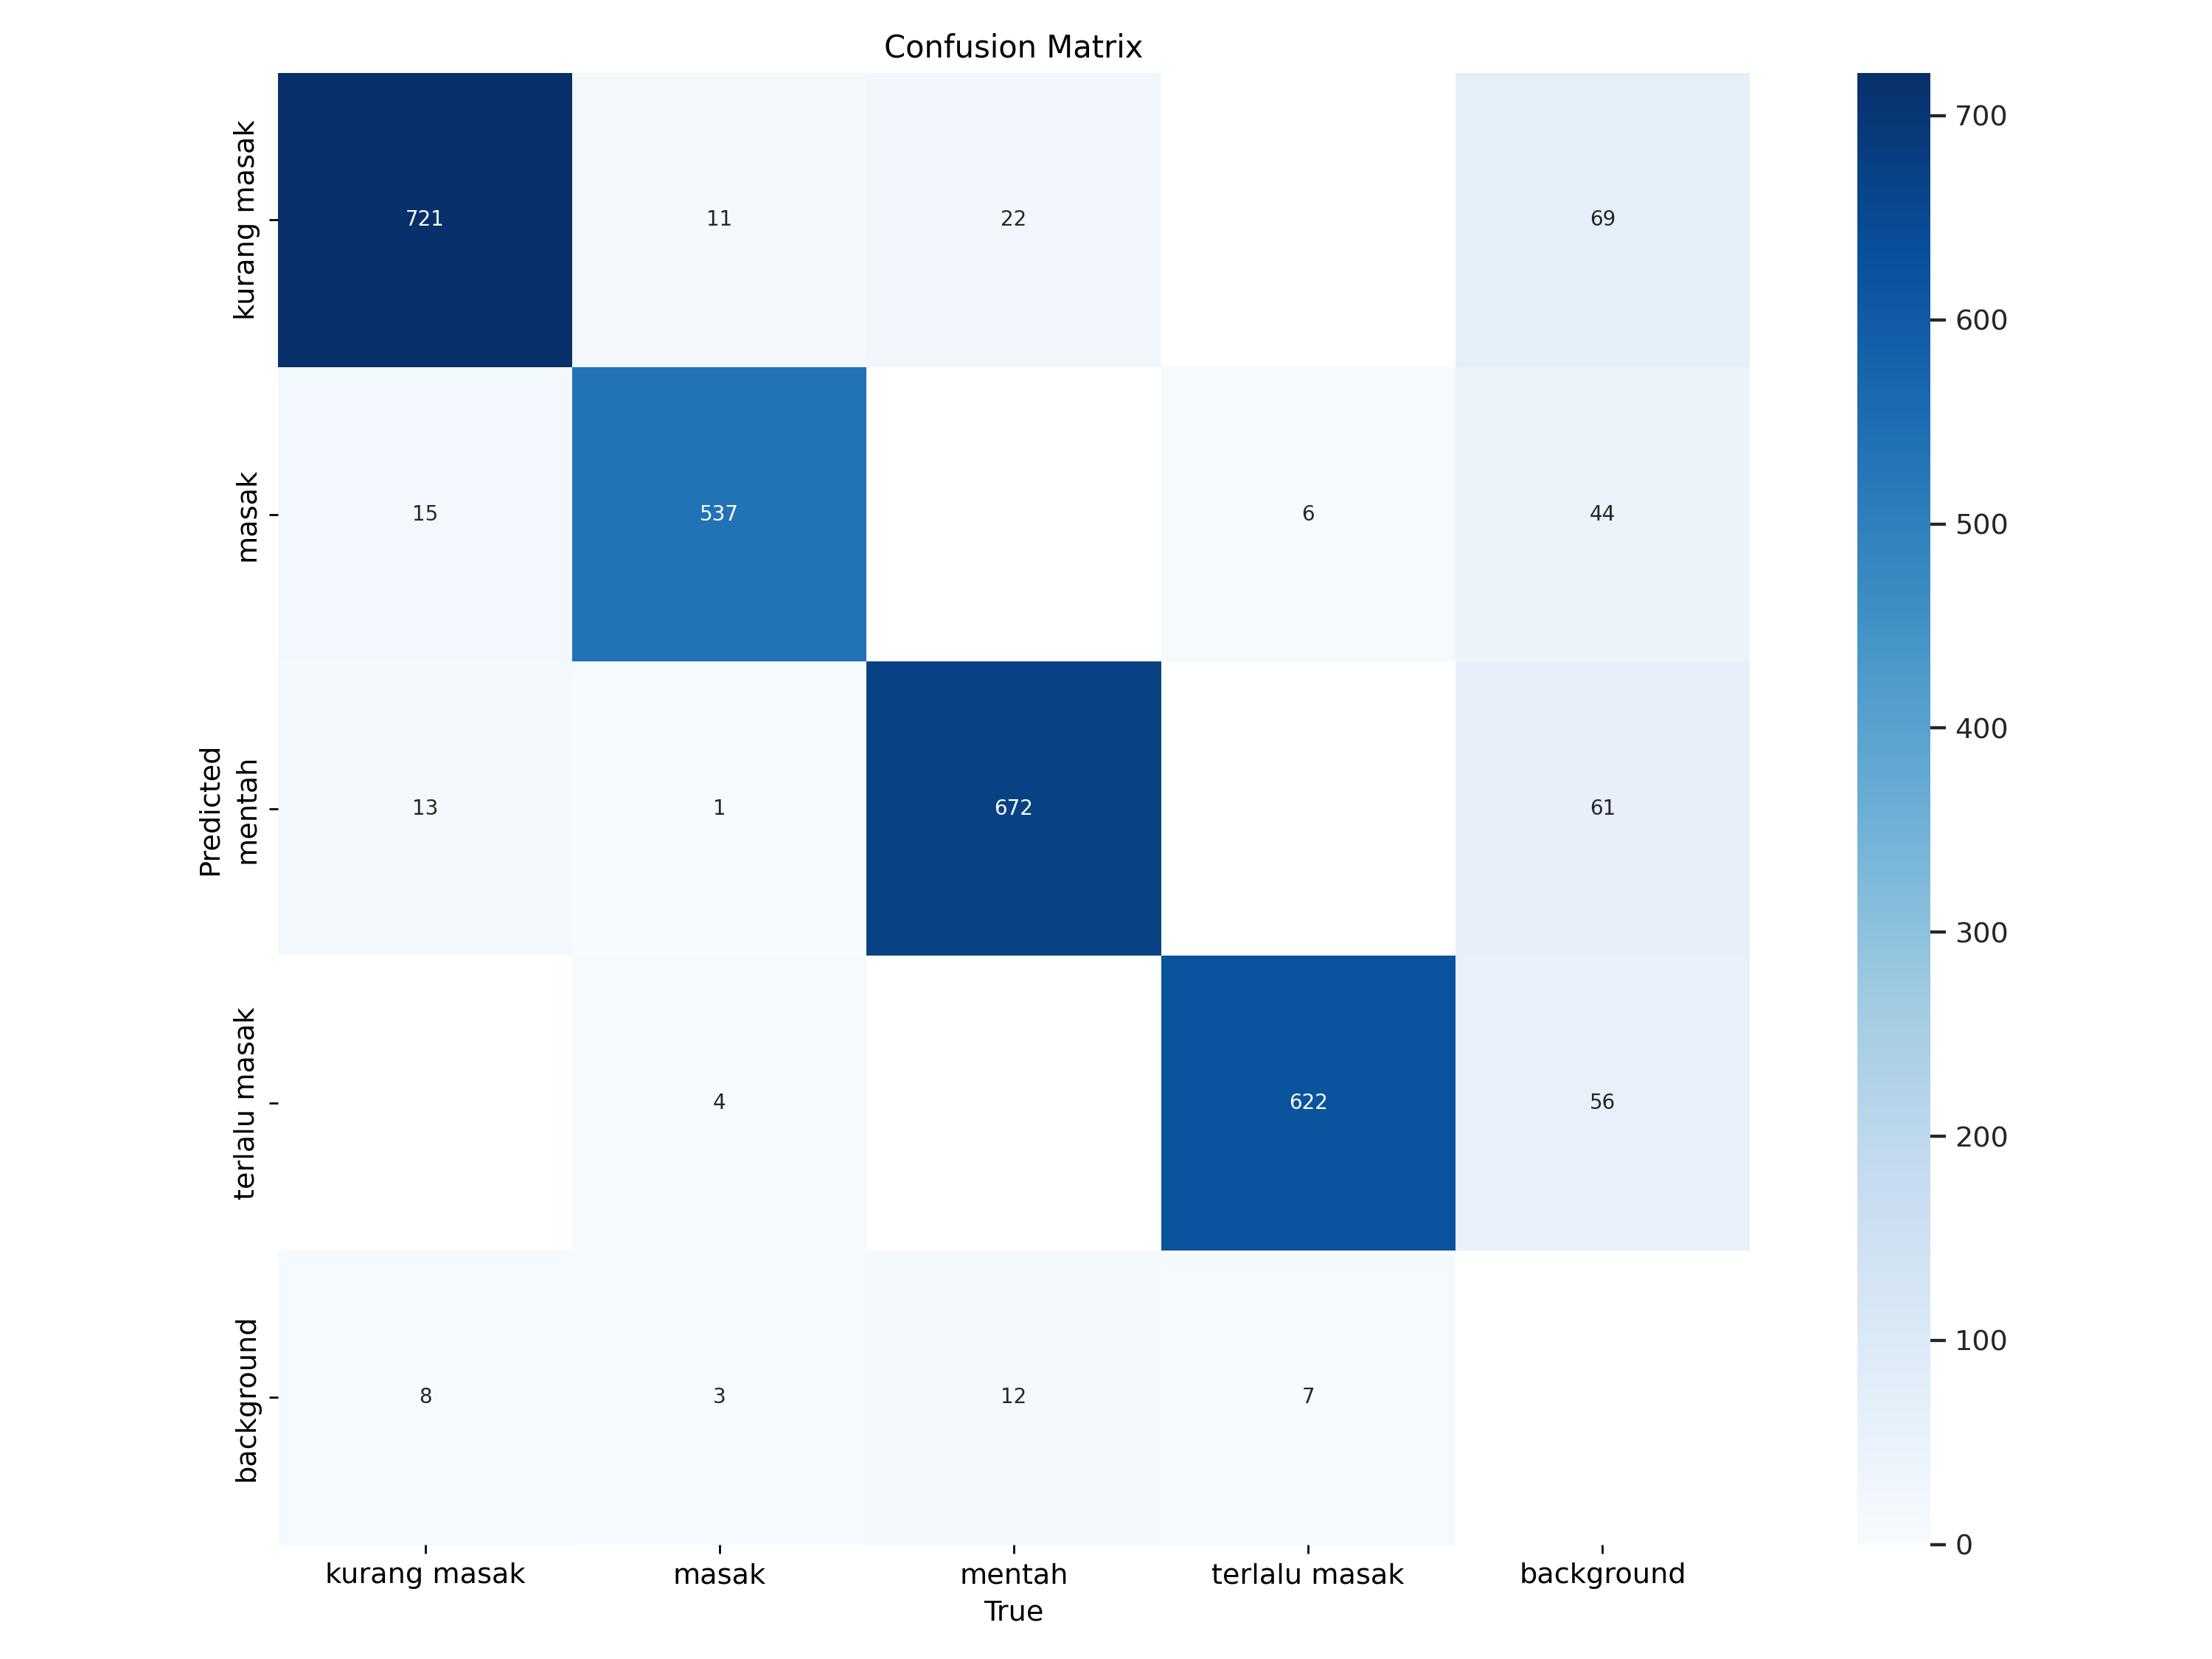

In [ ]:
# Menampilkan gambar hasil pelatihan model dalam bentuk matriks
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content/datasets


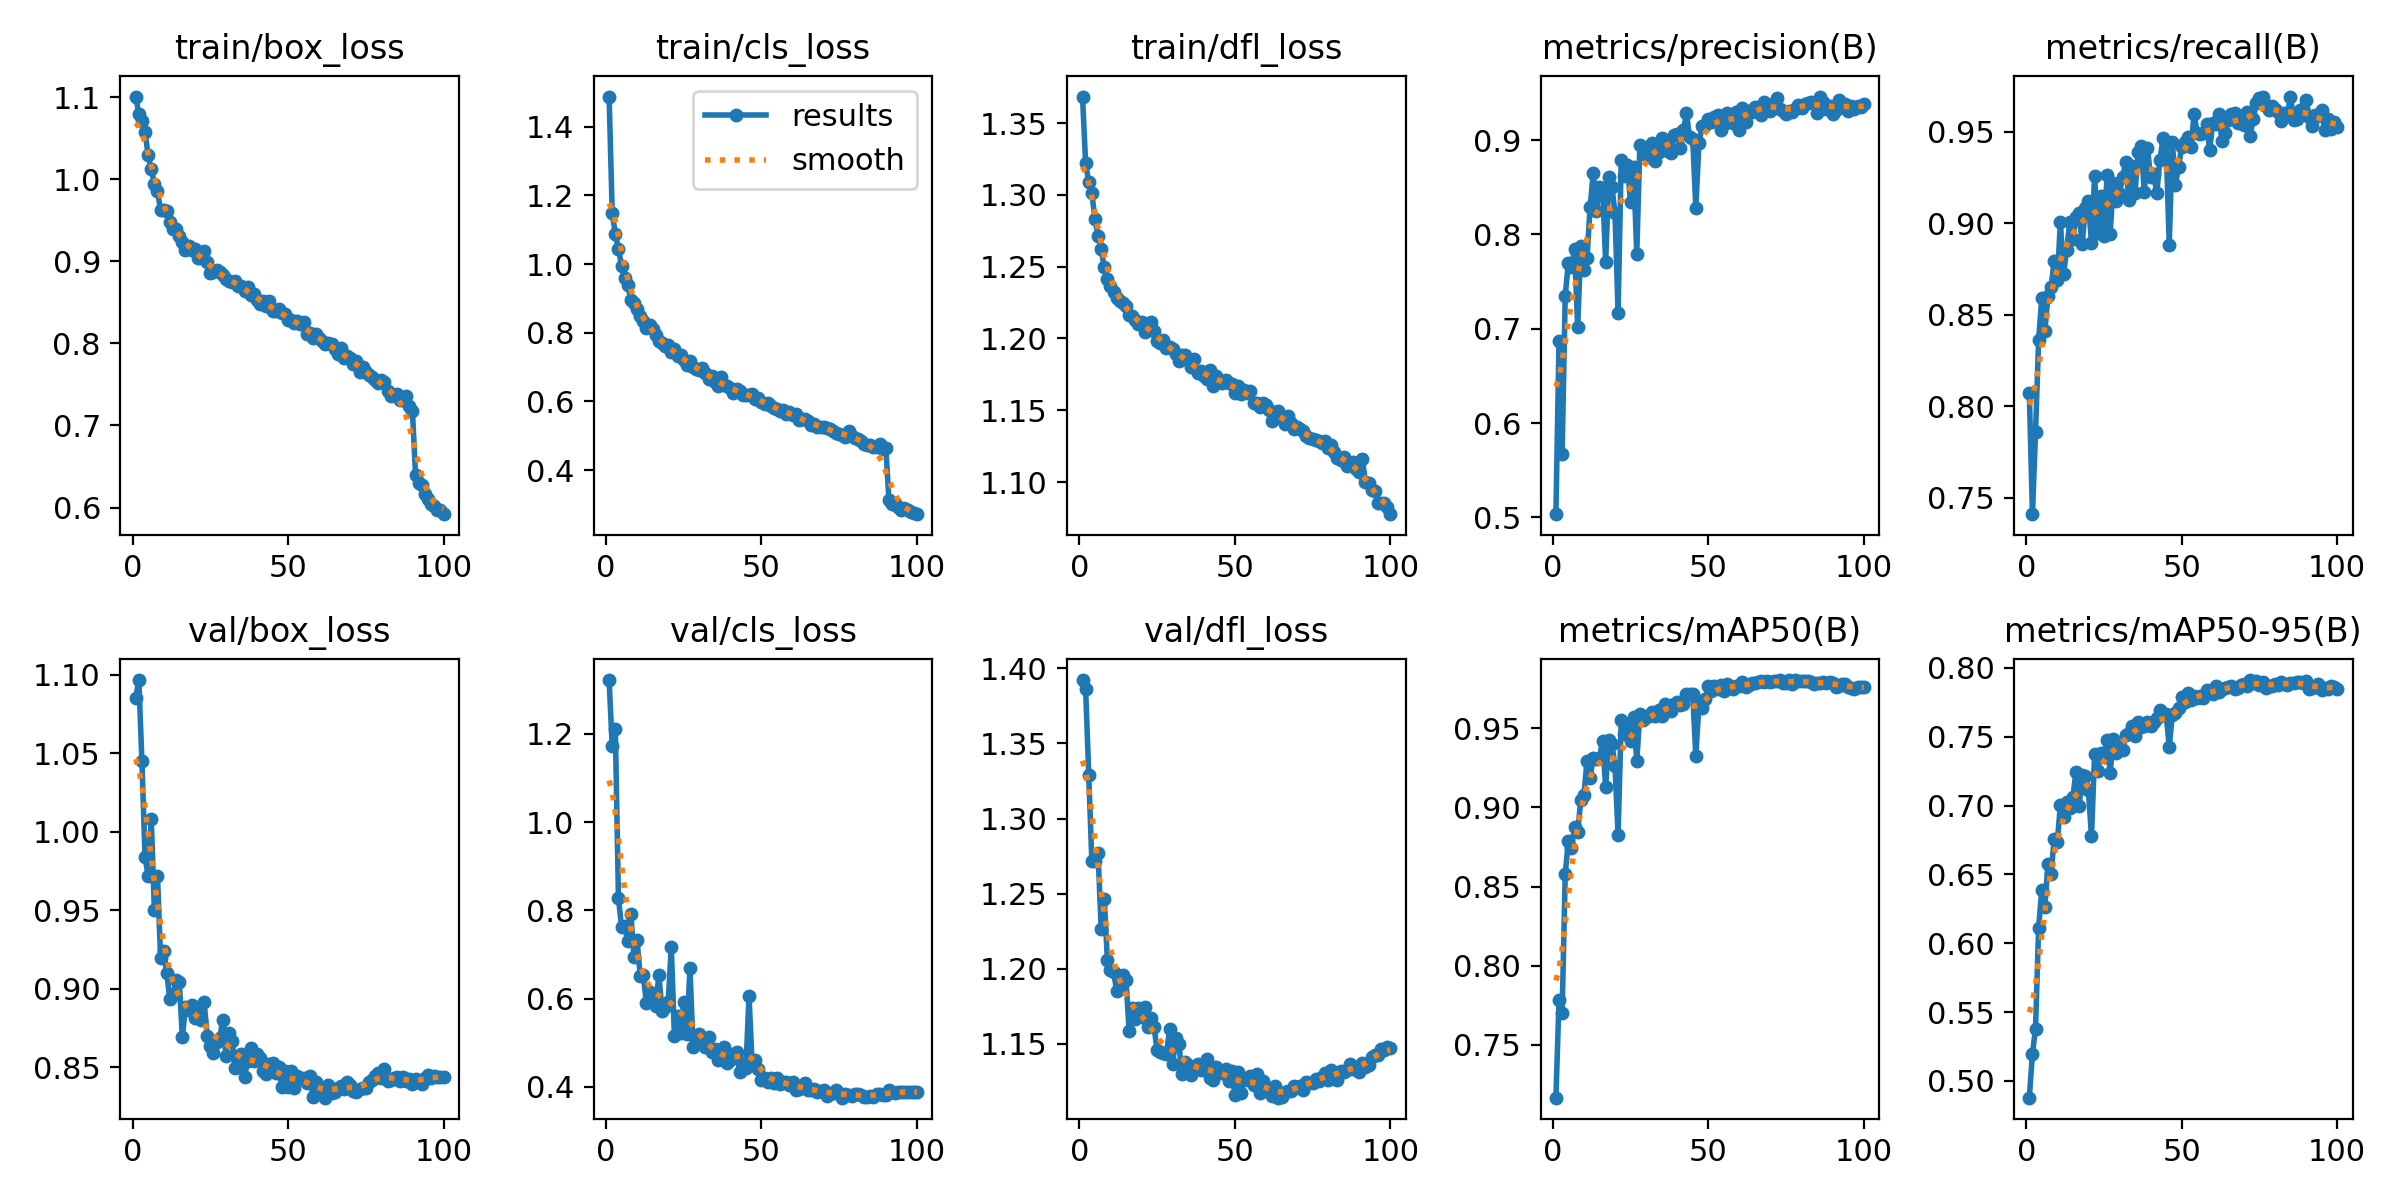

In [ ]:
# Menampilkan gambar hasil pelatihan model results
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/datasets


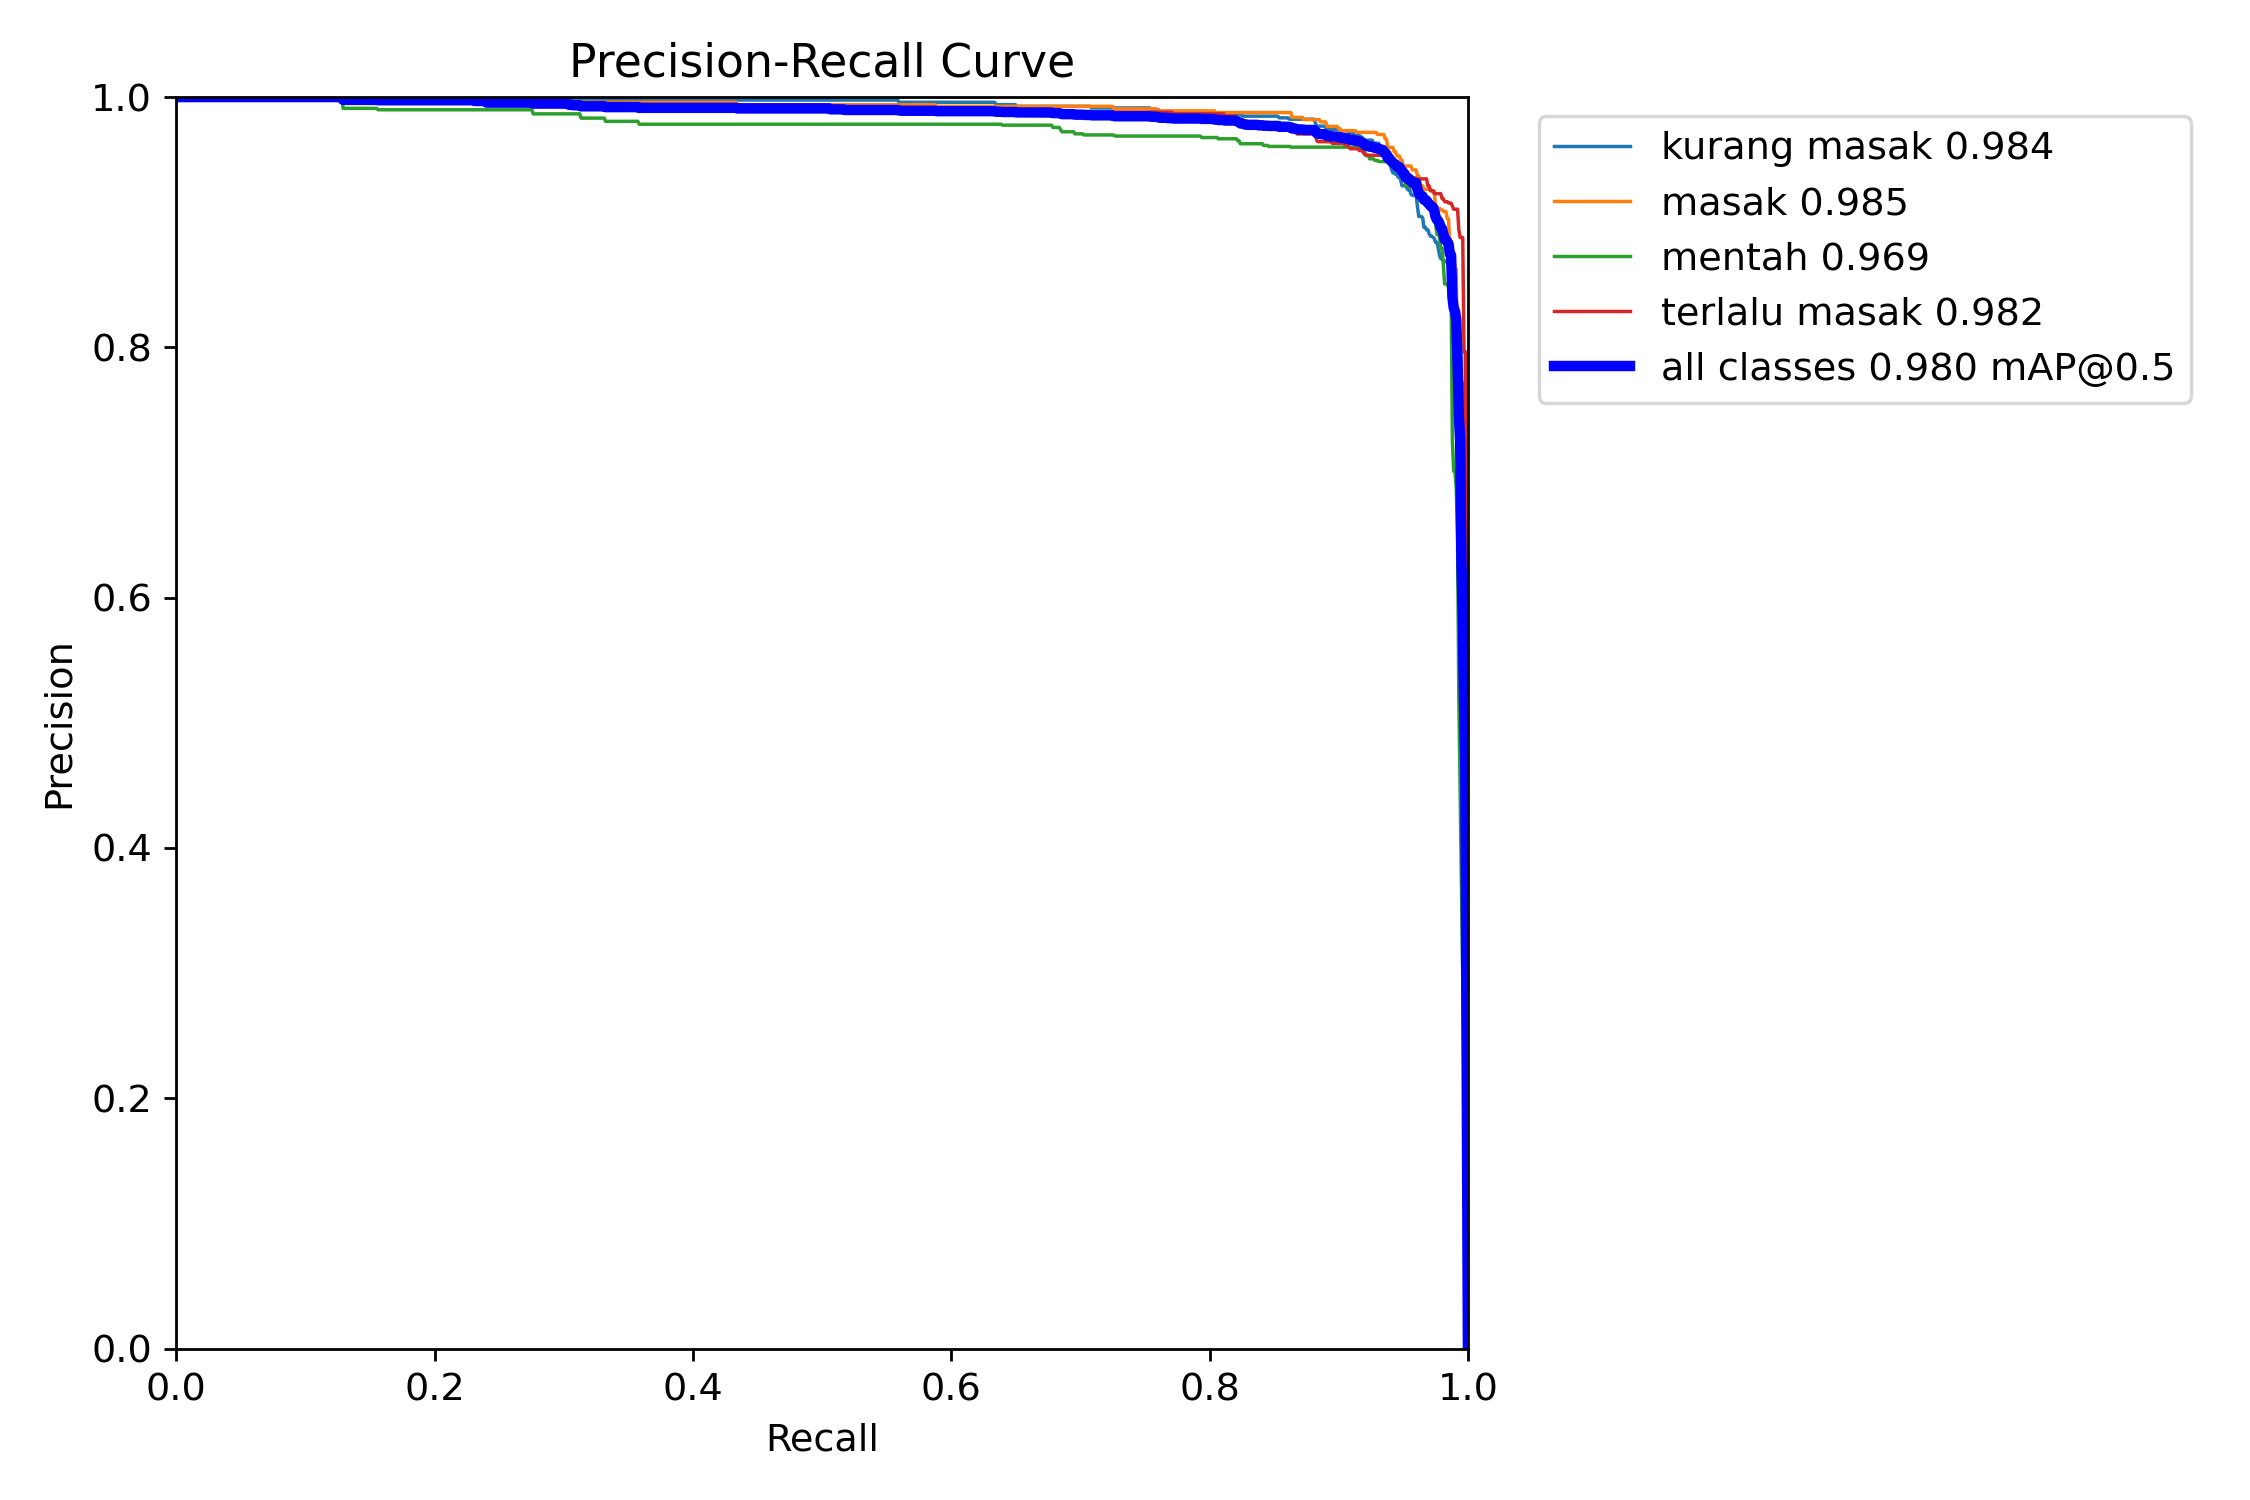

In [ ]:
# Menampilkan gambar hasil pelatihan model Precision dengan Recall
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

/content/datasets


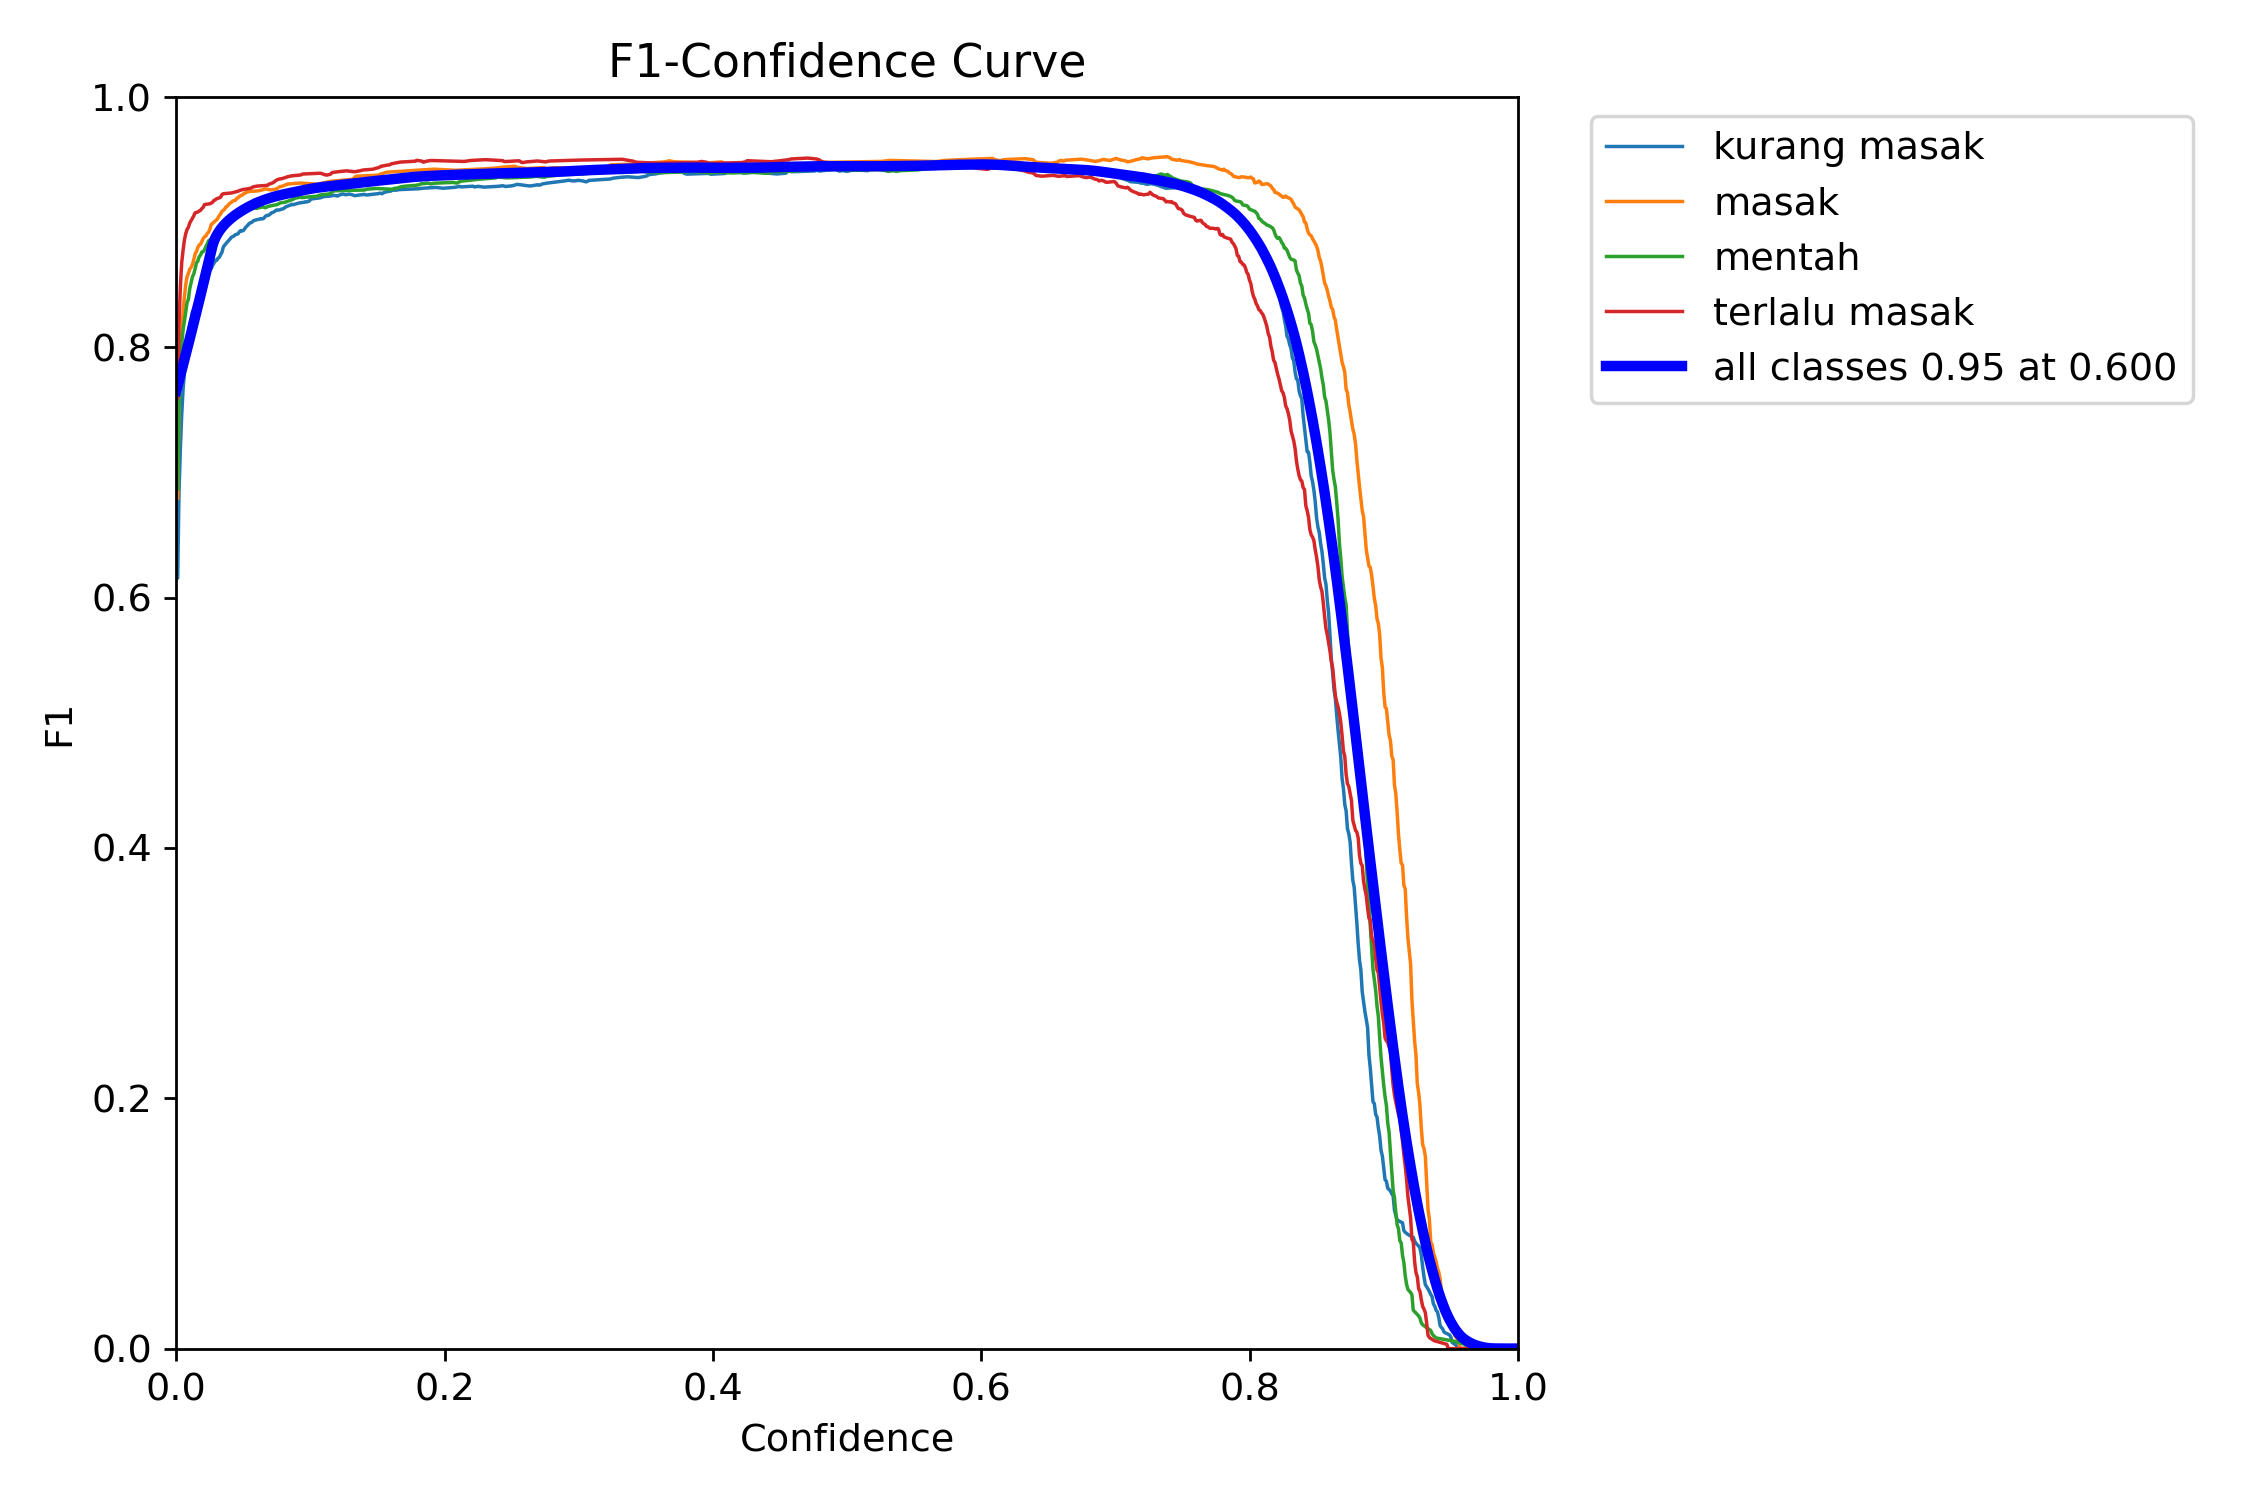

In [ ]:
# Menampilkan gambar hasil pelatihan model Recall dengan Confidence
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

/content/datasets


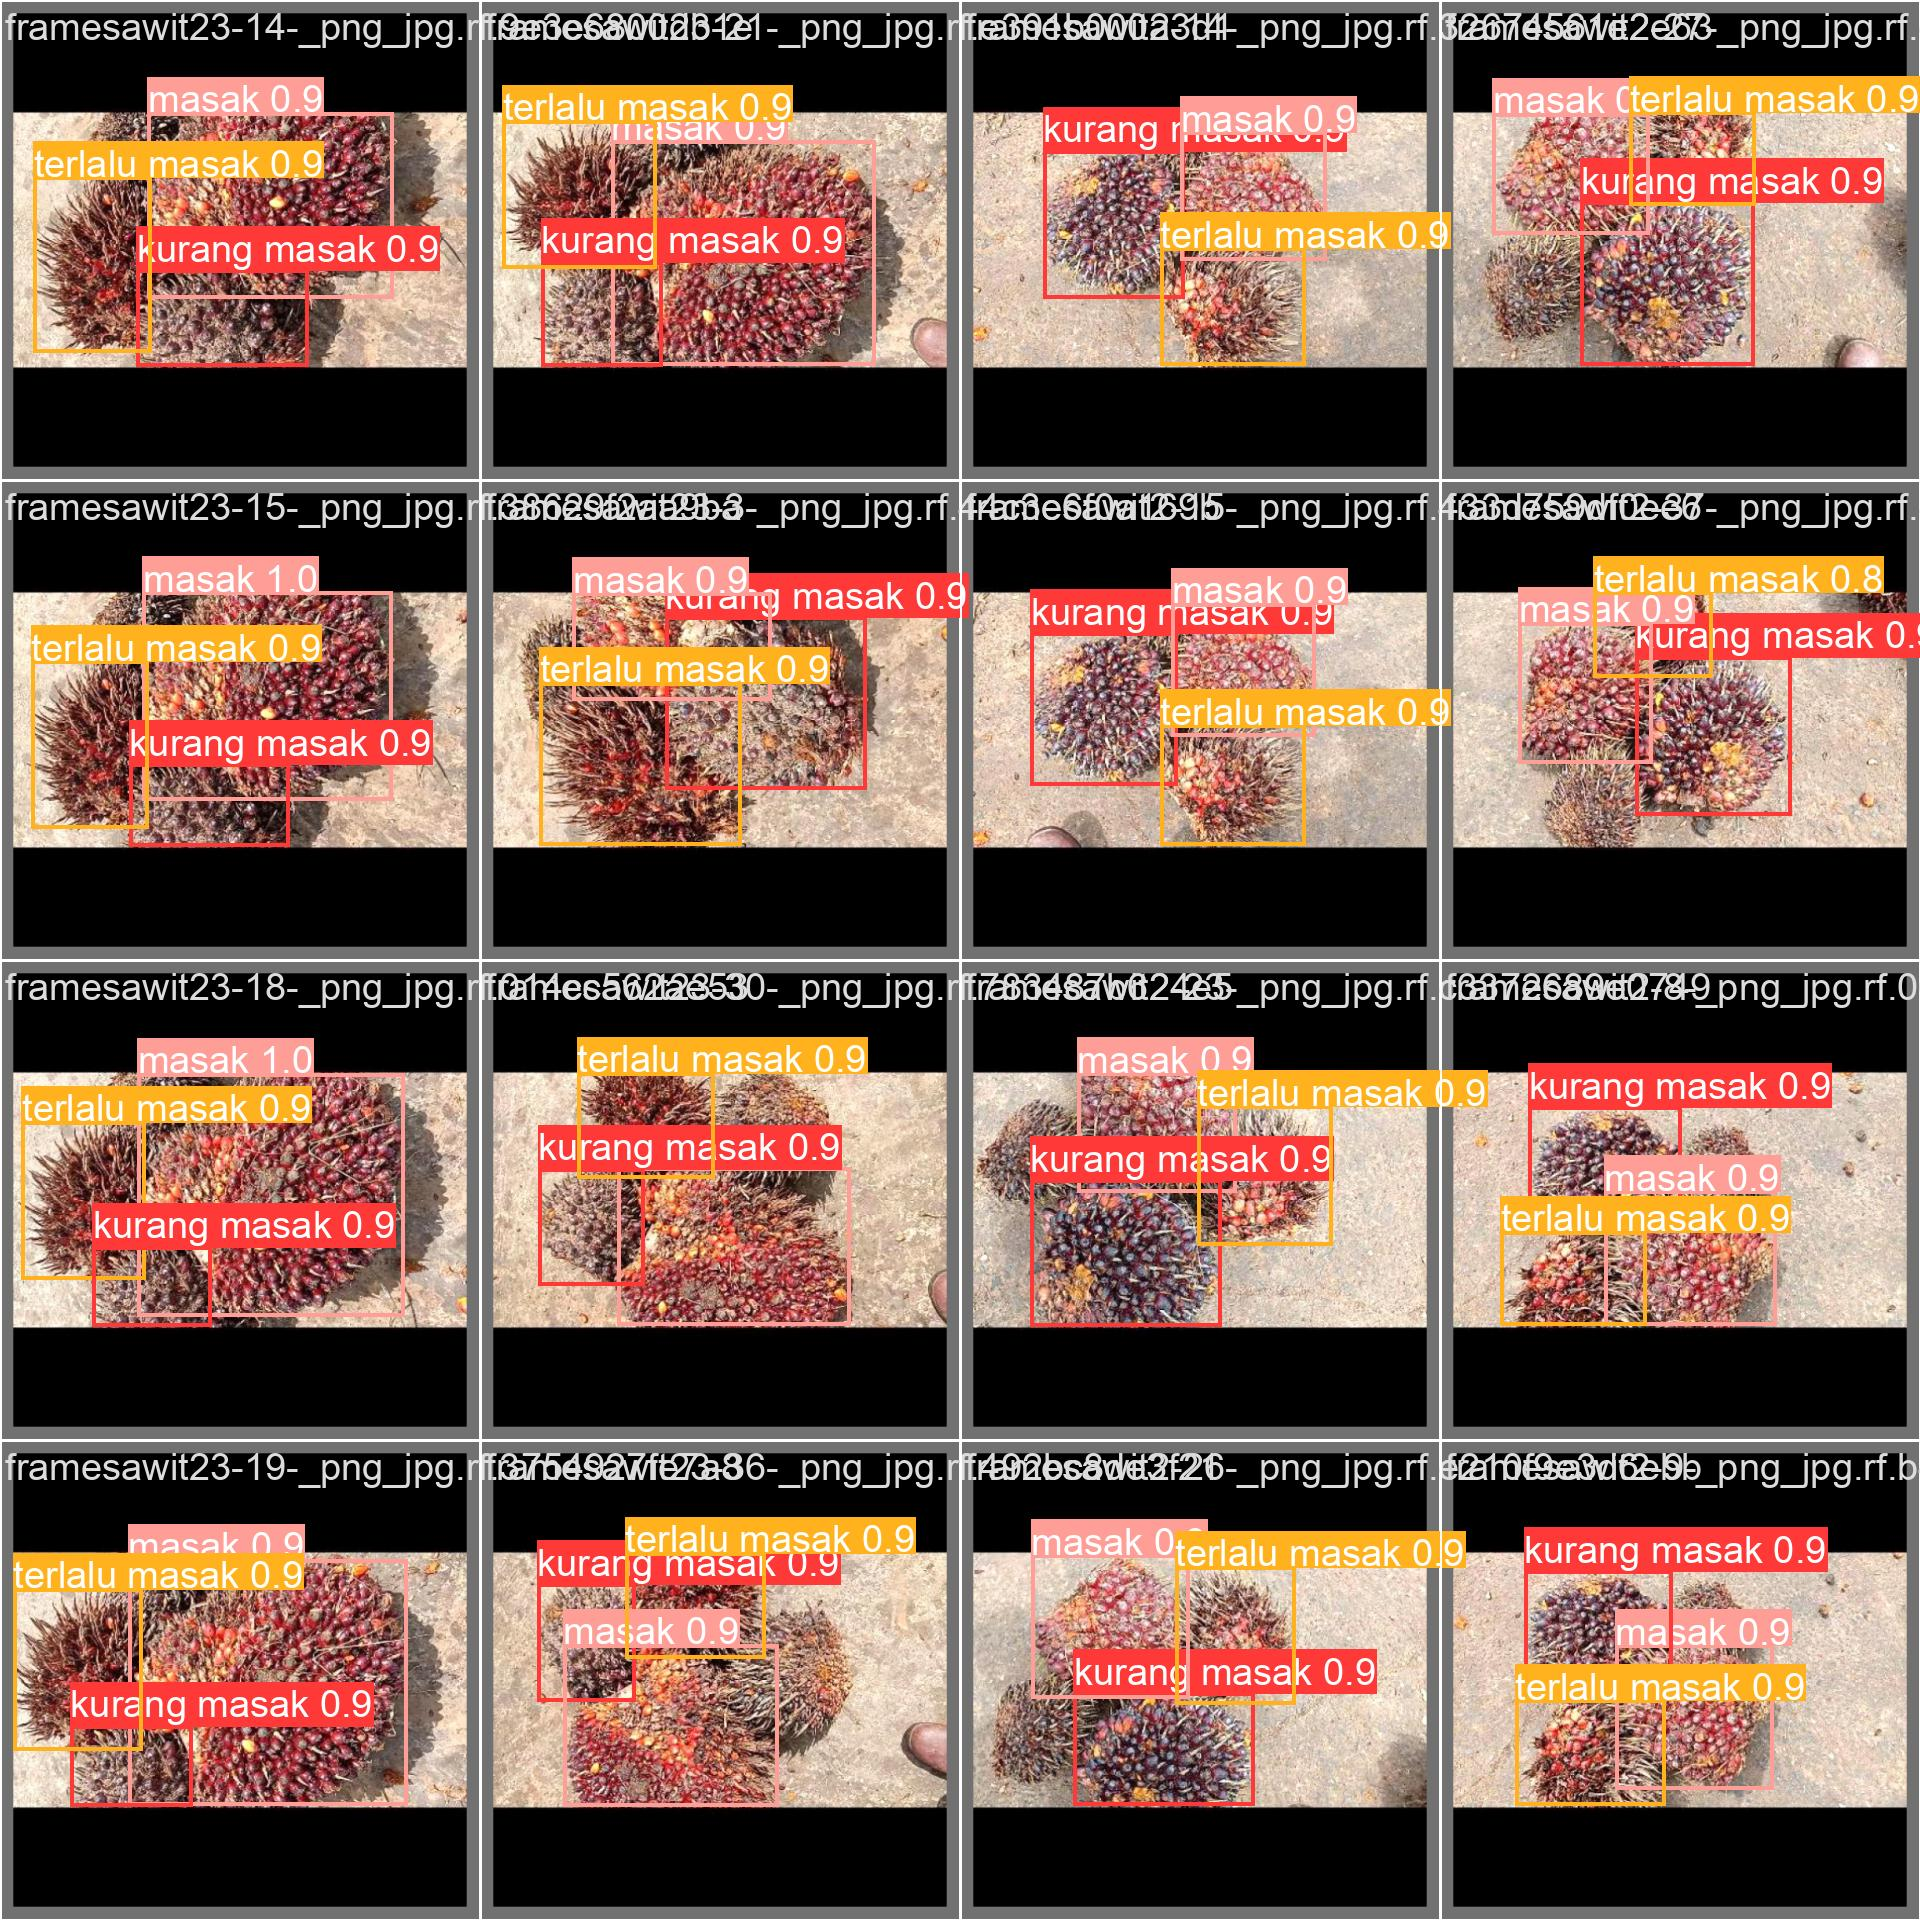

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
# melakukan validasi model deteksi objek
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/datasets/palm-oil-33-2/valid/labels.cache... 1311 images, 0 backgrounds, 0 corrupt: 100% 1311/1311 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 42, len(boxes) = 2654. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  I

## Inference with Custom Model

In [ ]:
# menggunakan model YOLOv8 yang sudah dilatih untuk melakukan prediksi
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/datasets
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/655 /content/datasets/datasets/palm-oil-33-2/test/images/100_-masak_mp4-5_jpg.rf.ec6e5b5443b5f418fcc059196087bc01.jpg: 544x544 1 masak, 14.4ms
image 2/655 /content/datasets/datasets/palm-oil-33-2/test/images/100_-mentah_mp4-8_jpg.rf.cceaebf5c4b670aef4697c9e26259a10.jpg: 544x544 3 mentahs, 14.3ms
image 3/655 /content/datasets/datasets/palm-oil-33-2/test/images/100_-terlalu-masak_mp4-2_jpg.rf.aa9de31385b

**NOTE:** Let's take a look at few results.

In [ ]:
# menampilkan beberapa gambar hasil prediksi dari direktori tertentu
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/sawit.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/sawit.jpg: 320x544 3 kurang masaks, 185.6ms
Speed: 3.2ms preprocess, 185.6ms inference, 873.9ms postprocess per image at shape (1, 3, 320, 544)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/palm.jpg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/palm.jpg: 256x416 2 kurang masaks, 209.1ms
Speed: 5.1ms preprocess, 209.1ms inference, 855.0ms postprocess per image at shape (1, 3, 256, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
!ls {HOME}/runs/detect/predict/

100_-masak_mp4-5_jpg.rf.18d59b73284f1709df7b62b244050836.jpg
100_-mentah_mp4-8_jpg.rf.f58e70036d3f6a602653af003e48278c.jpg
100_-terlalu-masak_mp4-2_jpg.rf.f20d76249f8b71291eda57d578e8d5ff.jpg
100_-terlalu-masak_mp4-4_jpg.rf.c3a195f90ad6b97a9b8f00101d5fce84.jpg
101_-abnormal_mp4-4_jpg.rf.db8c11c89ebf3aa053acbeaadec27c49.jpg
101_-masak_mp4-0_jpg.rf.0cfb7461b83caa0740f8946f30ae1f37.jpg
101_-masak_mp4-8_jpg.rf.47f9c66c74660cf8c02d4b71f1910bf6.jpg
101_-mentah_mp4-11_jpg.rf.eaaff2ca63cb3f72a3d0faee476c19fc.jpg
101_-terlalu-masak_mp4-5_jpg.rf.0bc15b5f777ef9ed98a1cba55bf63213.jpg
102_-kurang-masak_mp4-3_jpg.rf.d6cbdd546c40edcc34708b28cdff0625.jpg
102_-masak_mp4-10_jpg.rf.95e7b6dc4cacc684c8c5faf001492dc9.jpg
102_-mentah_mp4-0_jpg.rf.620b2bd8906dd5a4ffb369f78c158a27.jpg
103_-masak_mp4-10_jpg.rf.a3e2e75d4bf4db44254352b33dab5506.jpg
103_-mentah_mp4-11_jpg.rf.618b54f0795cf1c5a08a53195cddb52f.jpg
104_-abnormal_mp4-3_jpg.rf.8cb61b234213bb5cdf11d5dfc31ed45d.jpg
104_-kurang-masak_mp4-2_jpg.rf.539a9de33

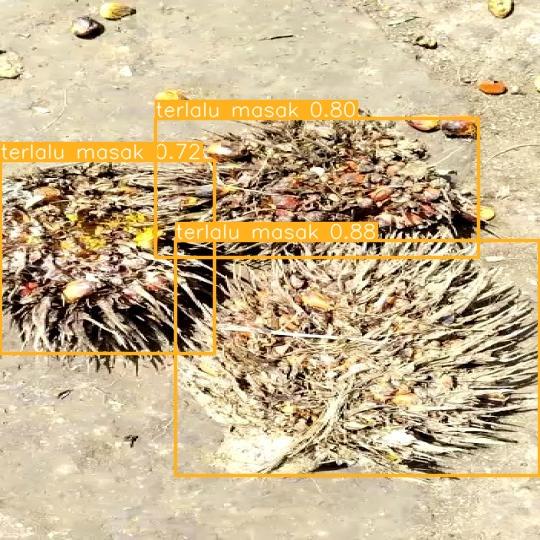

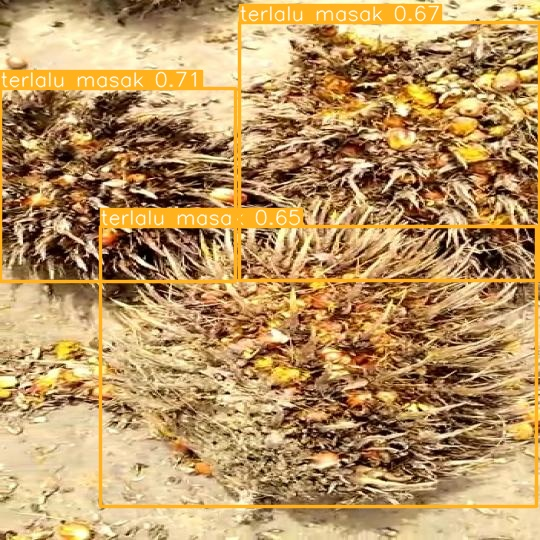

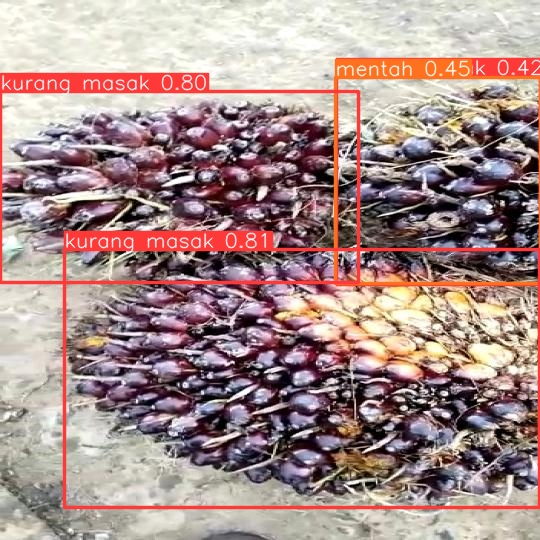



Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 242, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/predictor.py", line 205, in predict_cli
    for _ in gen:  # running CLI inference without accumulating any outputs (do not modify)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 35, in generator_context
    response = gen.send(None)
 

In [ ]:
# Menampilkan beberapa gambar hasil prediksi dari direktori tertentu
import glob
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")

# Menggunakan model YOLOv8 untuk memprediksi satu gambar
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/palm.jpg

Saving sawit3.jpg to sawit3.jpg


0: 320x544 2 kurang masaks, 12.3ms
Speed: 2.9ms preprocess, 12.3ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 544)


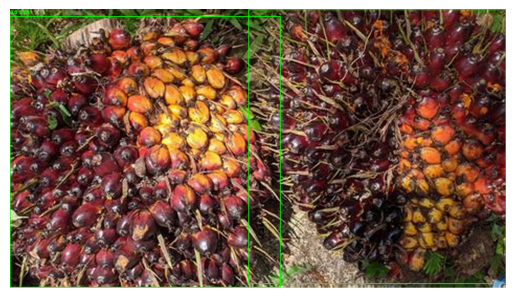

In [ ]:
# Langkah 1: Impor pustaka yang diperlukan
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Langkah 2: Unggah model dan gambar ke Google Colab
# Anda bisa mengunggah file model (best.pt) dan gambar melalui antarmuka pengguna Google Colab
# dari tab 'Files' di sisi kiri.

# Langkah 3: Muat model YOLOv8
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')  # Path ke model YOLOv8 Anda

# Langkah 4: Fungsi untuk mendeteksi objek dan menampilkan bounding box dengan akurasi
def detect_fruits(image_path):
    # Baca gambar
    img = cv2.imread(image_path)
    if img is None:
        print("Gambar tidak ditemukan!")
        return

    # Lakukan deteksi menggunakan YOLOv8
    results = model(img)

    # Iterasi melalui deteksi dan gambarkan bounding box dengan akurasi
    for result in results:
        for bbox in result.boxes:
            # Dapatkan koordinat bounding box dan skornya
            x1, y1, x2, y2 = map(int, bbox.xyxy[0])
            confidence = bbox.conf[0]
            label = bbox.cls[0]

            # Gambarkan bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Tampilkan gambar dengan bounding box
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Langkah 5: Unggah gambar yang ingin Anda deteksi
from google.colab import files
uploaded = files.upload()

# Deteksi dan tampilkan gambar yang diunggah
for image_name in uploaded.keys():
    detect_fruits(f'{image_name}')


In [ ]:
# Langkah 1: Impor pustaka yang diperlukan
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Langkah 2: Unggah model dan gambar ke Google Colab
# Anda bisa mengunggah file model (best.pt) dan gambar melalui antarmuka pengguna Google Colab
# dari tab 'Files' di sisi kiri.

# Langkah 3: Muat model YOLOv8
model = YOLO('/content/datasets/runs/detect/train/weights/best.pt')  # Path ke model YOLOv8 Anda

# Langkah 4: Fungsi untuk mendeteksi objek dan menampilkan bounding box dengan akurasi
def detect_fruits(image_path):
    # Baca gambar
    img = cv2.imread(image_path)
    if img is None:
        print("Gambar tidak ditemukan!")
        return

    # Lakukan deteksi menggunakan YOLOv8
    results = model(img)

    # Iterasi melalui deteksi dan gambarkan bounding box dengan akurasi
    for result in results:
        for bbox in result.boxes:
            # Dapatkan koordinat bounding box dan skornya
            x1, y1, x2, y2 = map(int, bbox.xyxy[0])
            confidence = bbox.conf[0]
            label = bbox.cls[0]

            # Gambarkan bounding box
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(img, f'{label} {confidence:.2f}', (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Tampilkan gambar dengan bounding box
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Langkah 5: Unggah gambar yang ingin Anda deteksi
from google.colab import files
uploaded = files.upload()

# Deteksi dan tampilkan gambar yang diunggah
for image_name in uploaded.keys():
    detect_fruits(f'{image_name}')


ModuleNotFoundError: No module named 'ultralytics'